<a href="https://colab.research.google.com/github/Savvy-Slowley/Pump-it-Up-Data-Mining-the-Water-Table-/blob/main/Pump_it_Up_Data_Mining_the_Water_Table_(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [123]:
#BASICS#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#PREPROCESSING MODELS#
# Train test split
from sklearn.model_selection import train_test_split
# For scaling data
from sklearn.preprocessing import StandardScaler
# Import Grid Search
from sklearn.model_selection import GridSearchCV
#To Encode label
from sklearn.preprocessing import LabelEncoder
#Apply PCA
from sklearn.decomposition import PCA
# Make a pipeline
from sklearn.pipeline import make_pipeline
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder


#CLASSIFICATION MODELS#
#Make a Logistic Regression
from sklearn.linear_model import LogisticRegression
#Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#Import the Light Gradient Boosting Classifier
from lightgbm import LGBMClassifier
#Import the Extreme Gradient Boosting Classifier
from xgboost import XGBClassifier
#Import the Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
#Import the Adaptive Boosting Classifier
from sklearn.ensemble import AdaBoostClassifier

#CLASSIFICATION METRICS#
#Import score accuracy
from sklearn.metrics import accuracy_score
#Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
#Import for confusion metrics(Calculate Sensitivity, Specificity, Type 1 & 2 Error)
from sklearn import metrics
#Import for Classification Report
from sklearn.metrics import classification_report

# Generating The Data

In [2]:
#https://www.geeksforgeeks.org/how-to-merge-two-csv-files-by-specific-column-using-pandas-in-python/
feature_data = pd.read_csv('/content/Pump it Up Data Mining the Water Table Train Features.csv')
feature_label_data = pd.read_csv('/content/Pump it Up Data Mining the Water Table Train Labels.csv')
df = pd.merge(feature_data, feature_label_data, on='id', how='inner')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [3]:
print('Features Shape:', feature_data.shape)
print('Label Shape:', feature_label_data.shape)
print('Combined Shape:', df.shape)

Features Shape: (59400, 40)
Label Shape: (59400, 2)
Combined Shape: (59400, 41)


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
df.duplicated().any()

False

In [6]:
df.isnull().any()

id                       False
amount_tsh               False
date_recorded            False
funder                    True
gps_height               False
installer                 True
longitude                False
latitude                 False
wpt_name                 False
num_private              False
basin                    False
subvillage                True
region                   False
region_code              False
district_code            False
lga                      False
ward                     False
population               False
public_meeting            True
recorded_by              False
scheme_management         True
scheme_name               True
permit                    True
construction_year        False
extraction_type          False
extraction_type_group    False
extraction_type_class    False
management               False
management_group         False
payment                  False
payment_type             False
water_quality            False
quality_

In [7]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

The less features the more accurate the model will be. Alot of these features have very little importance. Other feature are alike to other features. I'm sure in the grand scheme of things alot of these features are important for the big picture but not building an accurate model.

In [8]:
df.drop(columns=["scheme_name",
                    'funder',
                    'installer' ,
                    'scheme_name', 
                    'permit',
                    'public_meeting', 
                    'subvillage', 
                    'payment_type', 
                    'payment', 
                    'recorded_by', 
                    'construction_year', 
                    'num_private', 
                    'id',
                    'date_recorded',
                    'wpt_name',
                    'extraction_type_group', 
                    'extraction_type_class',
                    'scheme_management',
                    'management_group',
                    'quantity_group',
                    'source_type',
                    'source_class',
                    'waterpoint_type_group',
                    'quality_group' ], inplace=True)

In [9]:
df.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'extraction_type', 'management', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group'],
      dtype='object')

In [10]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,15.297003,5.629747,179.909983,0.529596
std,2997.574558,693.116350,6.567432,2.946019e+00,17.587406,9.633649,471.482176,0.628080
min,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,12.000000,3.000000,25.000000,0.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,1.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2.000000


In [11]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [12]:
df['longitude'].value_counts()

0.000000     1812
39.088875       2
39.105307       2
37.543401       2
38.180538       2
             ... 
38.710520       1
40.117029       1
34.672962       1
39.433604       1
34.890838       1
Name: longitude, Length: 57516, dtype: int64

In [13]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [14]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [15]:
gps_mean = df['gps_height'].mean()
df['gps_height'] = df['gps_height'].replace(0, gps_mean)
tsh_mean = df['amount_tsh'].mean()
df['amount_tsh'] = df['amount_tsh'].replace(0, tsh_mean)
long_mean = df['longitude'].mean()
df['longitude'] = df['longitude'].replace(0, long_mean)
pop_mean = df['population'].mean()
df['population'] = df['population'].replace(0, pop_mean)

In [16]:
df.describe()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000
mean,540.321165,898.240993,35.116960,-5.706033e+00,15.297003,5.629747,244.668491,0.529596
std,2977.438072,523.318156,2.573963,2.946019e+00,17.587406,9.633649,454.368583,0.628080
min,0.200000,-90.000000,29.607122,-1.164944e+01,1.000000,0.000000,1.000000,0.000000
25%,317.650385,668.297239,33.354079,-8.540621e+00,5.000000,2.000000,100.000000,0.000000
50%,317.650385,668.297239,34.908743,-5.021597e+00,12.000000,3.000000,179.909983,0.000000
75%,317.650385,1319.250000,37.178387,-3.326156e+00,17.000000,5.000000,215.000000,1.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2.000000


# Exploratory Data Analysis (EDA)

In [17]:
# Changing for EDA purposes(I will change it back later on in the code) 
df['status_group'] = df['status_group'].map({ 0 : 'Functional', 1 : 'Functional Needs Repair', 2 : 'Non Functional'})

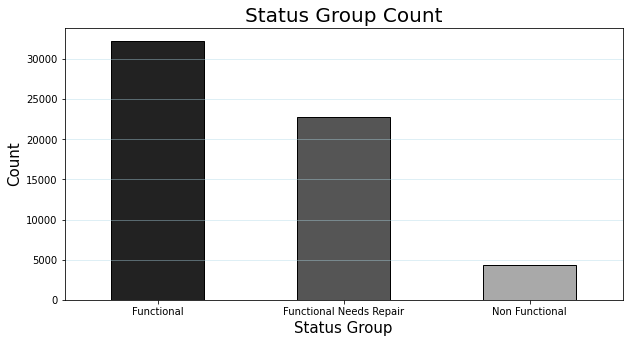

In [18]:
plt.figure(figsize=(10,5))
df['status_group'].value_counts().plot(kind = 'bar', color=['#222222', '#555555', '#a9a9a9'], edgecolor='k');
plt.title('Status Group Count', fontsize = 20);
plt.xlabel('Status Group', fontsize = 15);
plt.ylabel('Count', fontsize = 15); 
plt.tick_params(axis='x', rotation=0)
plt.grid(axis='y', color='lightblue', alpha=.5)

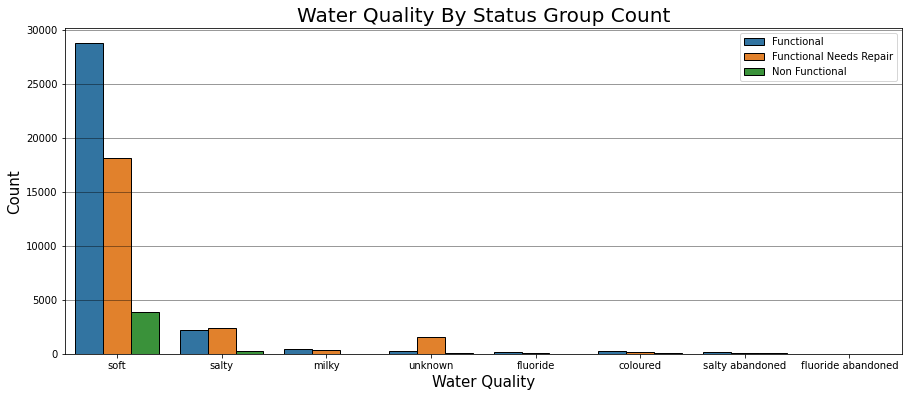

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='water_quality',hue='status_group', edgecolor='k' ,data=df);
plt.legend(loc= ('upper right'))
plt.title('Water Quality By Status Group Count', fontsize = 20);
plt.xlabel('Water Quality', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.grid(axis='y', color='k', alpha=.5)

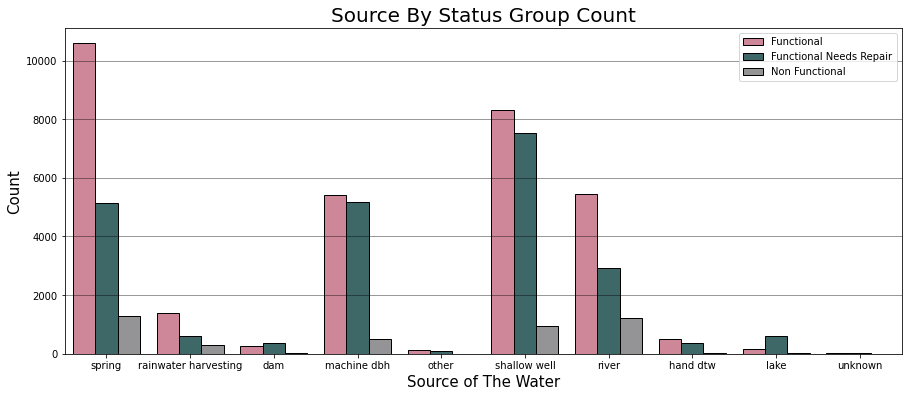

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x='source',hue='status_group', edgecolor='k',palette=['#DA7B93','#376E6F','#949398FF'] ,data=df);
plt.legend(loc= ('upper right'))
plt.title('Source By Status Group Count', fontsize = 20);
plt.xlabel('Source of The Water', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.grid(axis='y', color='k', alpha=.5)

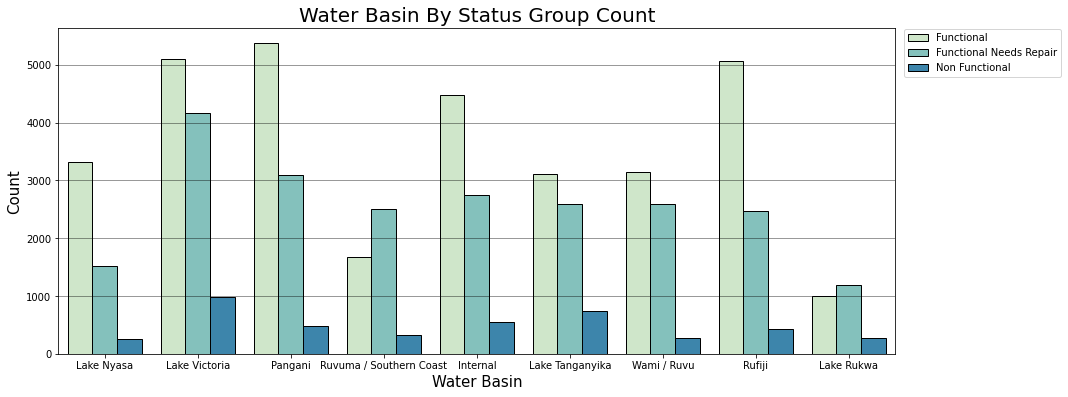

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(x='basin',hue='status_group', edgecolor='k',palette='GnBu' ,data=df);
plt.legend(loc= (1.01, .85))
plt.title('Water Basin By Status Group Count', fontsize = 20);
plt.xlabel('Water Basin', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.grid(axis='y', color='k', alpha=.5)

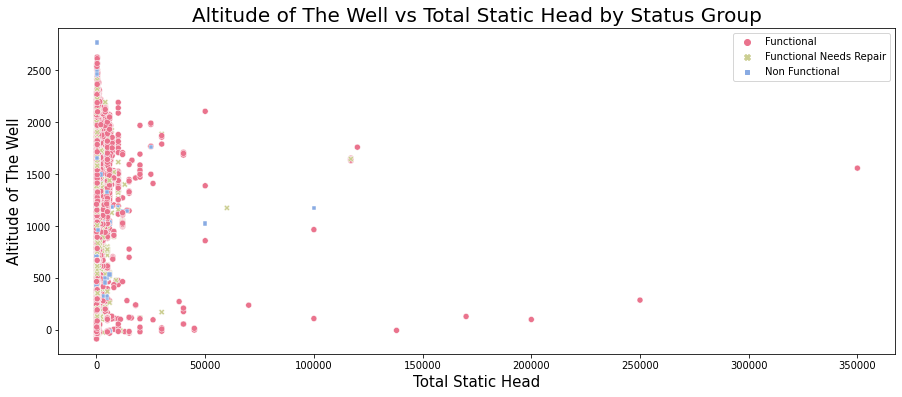

In [22]:
plt.figure(figsize=(15,6));
sns.scatterplot(data=df, x="amount_tsh", y='gps_height',hue='status_group', palette=['#EA738DFF','#CBCE91FF', '#89ABE3FF'], style="status_group")
plt.legend(loc= ('upper right'))
plt.title('Altitude of The Well vs Total Static Head by Status Group', fontsize = 20);
plt.xlabel('Total Static Head', fontsize = 15);
plt.ylabel('Altitude of The Well', fontsize = 15);

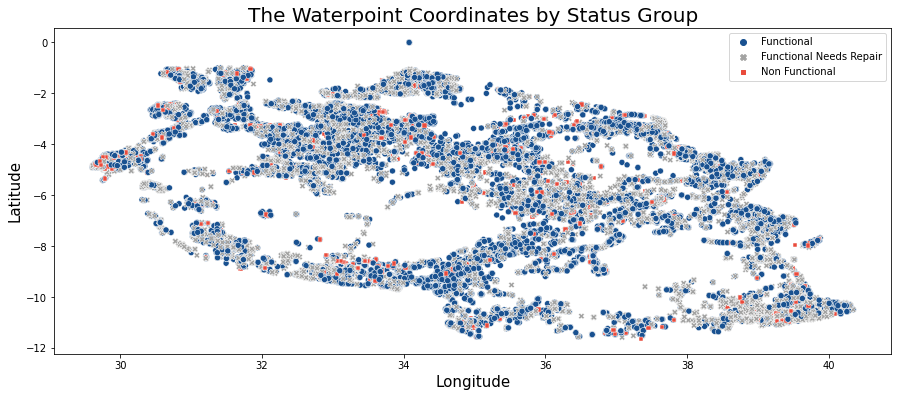

In [23]:
plt.figure(figsize=(15,6));
sns.scatterplot(data=df, x="longitude", y='latitude',hue='status_group', palette=['#195190FF','#A2A2A1FF', '#E94B3CFF'], style="status_group")
plt.legend(loc= ('upper right'))
plt.title('The Waterpoint Coordinates by Status Group', fontsize = 20);
plt.xlabel('Longitude', fontsize = 15);
plt.ylabel('Latitude', fontsize = 15);

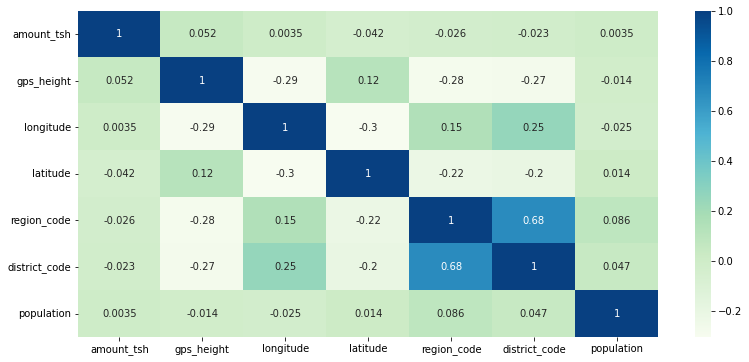

In [24]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(), cmap="GnBu", annot=True);

# Data Pre-Processing

In [25]:
# Changing for EDA purposes(I will change it back later on in the code) 
df['status_group'] = df['status_group'].map({ 'Functional': 0, 'Functional Needs Repair' : 1, 'Non Functional' : 2})

In [26]:
df.select_dtypes(include='object').columns

Index(['basin', 'region', 'lga', 'ward', 'extraction_type', 'management',
       'water_quality', 'quantity', 'source', 'waterpoint_type'],
      dtype='object')

In [27]:
'''ohe = OneHotEncoder(drop = 'first', sparse = False)
df = ohe.fit_transform(df[['basin', 'region', 'lga', 'ward', 'extraction_type',
                           'management','water_quality', 'quantity', 'source', 'waterpoint_type']])
ohe.categories_'''

"ohe = OneHotEncoder(drop = 'first', sparse = False)\ndf = ohe.fit_transform(df[['basin', 'region', 'lga', 'ward', 'extraction_type',\n                           'management','water_quality', 'quantity', 'source', 'waterpoint_type']])\nohe.categories_"

In [28]:
df = pd.get_dummies(df, columns = ['waterpoint_type','source','quantity', 'water_quality',
                                   'management', 'extraction_type', 'ward', 'lga','region', 'basin'])
df.head()

,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,status_group,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,management_company,management_other,...,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu
0,6000.000000,1390.000000,34.938093,-9.856322,11,5,109.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,317.650385,1399.000000,34.698766,-2.147466,20,2,280.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,25.000000,686.000000,37.460664,-3.821329,21,4,250.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,317.650385,263.000000,38.486161,-11.155298,90,63,58.000000,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,317.650385,668.297239,31.130847,-1.825359,18,1,179.909983,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
y = df['status_group']
X = np.array(df.drop(columns = ['status_group']))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [31]:
scaler = StandardScaler()
# Fit on training set only
scaler.fit(X_train)
# Apply transform to both the training set and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Building the Models

## Random Forest

In [32]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Classifier Training Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Random Forest Classifier Testing Accuracy:', accuracy_score(y_test, rf.predict(X_test)))

Random Forest Classifier Training Accuracy: 0.9960493827160494
Random Forest Classifier Testing Accuracy: 0.7988552188552188
CPU times: user 1min 8s, sys: 122 ms, total: 1min 8s
Wall time: 1min 8s


After running a grid search with alot of parameters. These are the best parameters for Random Forest:

{'max_depth': 39,

 'max_features': 5,

 'min_samples_leaf': 2,

 'min_samples_split': 2,

 'n_estimators': 50}
 
 (I didn't keep the code because it takes too long to run).



In [33]:
%%time
rf = RandomForestClassifier(max_depth = 39, max_features = 5, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50)
rf.fit(X_train, y_train)
print('Random Forest Classifier After GS Training Accuracy:', accuracy_score(y_train, rf.predict(X_train)))
print('Random Forest Classifier After GS Testing Accuracy:', accuracy_score(y_test, rf.predict(X_test)))

Random Forest Classifier After GS Training Accuracy: 0.6637934904601571
Random Forest Classifier After GS Testing Accuracy: 0.6527946127946128
CPU times: user 6.62 s, sys: 50.5 ms, total: 6.67 s
Wall time: 6.67 s


## Boosting

### Adaptive Boosting

In [34]:
%%time
aba = AdaBoostClassifier()
aba.fit(X_train, y_train)
print('Adaptive Boosting Training accuracy:', aba.score(X_train, y_train))
print('Adaptive Boosting Testing accuracy:', aba.score(X_test, y_test))

Adaptive Boosting Training accuracy: 0.7195735129068462
Adaptive Boosting Testing accuracy: 0.7208080808080808
CPU times: user 1min 47s, sys: 170 ms, total: 1min 47s
Wall time: 1min 46s


### Light Gradient Boosting

In [35]:
%%time
lgbm = LGBMClassifier(max_depth = 20)
lgbm.fit(X_train, y_train)
print('Light Gradient Boosting Training accuracy:', lgbm.score(X_train, y_train))
print('Light Gradient Boosting Testing accuracy:', lgbm.score(X_test, y_test))

Light Gradient Boosting Training accuracy: 0.7891582491582492
Light Gradient Boosting Testing accuracy: 0.7787205387205387
CPU times: user 2min 5s, sys: 2.02 s, total: 2min 7s
Wall time: 1min 11s


## Principal Component Analysis (PCA)

### Picking The Best Principal Component

In [36]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X)

In [37]:
# Instantiate & fit data using PCA
pca = PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0.5, 1.0, 'The Explained Variance Ratios Of The First 10 Principal Components')

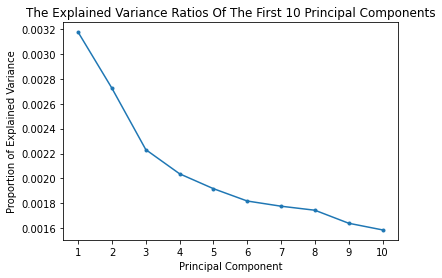

In [38]:
# Plot the explained variance ratios of the first 10 principal components
plt.plot(range(1, 11), pca.explained_variance_ratio_[:10], marker = '.')
plt.xticks(ticks = range(1, 11))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.title('The Explained Variance Ratios Of The First 10 Principal Components')

In [39]:
y = df['status_group']
X = np.array(df.drop(columns = ['status_group']))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

### Random Forest For 3 Components

In [40]:
%%time
# Create a pipeline for scaling, PCA, & Random Forest
rf_pipe = make_pipeline(StandardScaler(), PCA(n_components = 3), RandomForestClassifier(max_depth = 39, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 50))
rf_pipe.fit(X_train, y_train)
print('Random Forest Pipeline & PCA Training accuracy:', rf_pipe.score(X_train, y_train))
print('Random Forest Pipeline & PCA Testing accuracy:', rf_pipe.score(X_test, y_test))

Random Forest Pipeline & PCA Training accuracy: 0.8250953984287318
Random Forest Pipeline & PCA Testing accuracy: 0.7323232323232324
CPU times: user 20.9 s, sys: 2.45 s, total: 23.4 s
Wall time: 15.9 s


### Light Gradient Boosting  For 3 Components

In [41]:
%%time
# Create a pipeline for scaling, PCA, & Random Forest
lgbm_pipe = make_pipeline(StandardScaler(), PCA(n_components = 3), LGBMClassifier(max_depth = 20))
lgbm_pipe.fit(X_train, y_train)
print('Light Gradient Boosting & PCA Pipeline Training accuracy:', lgbm_pipe.score(X_train, y_train))
print('Light Gradient Boosting & PCA Pipeline Testing accuracy:', lgbm_pipe.score(X_test, y_test))

Light Gradient Boosting & PCA Pipeline Training accuracy: 0.7073400673400674
Light Gradient Boosting & PCA Pipeline Testing accuracy: 0.6882828282828283
CPU times: user 19.3 s, sys: 2.35 s, total: 21.7 s
Wall time: 13 s


# Results

## Accuracy For Each Model

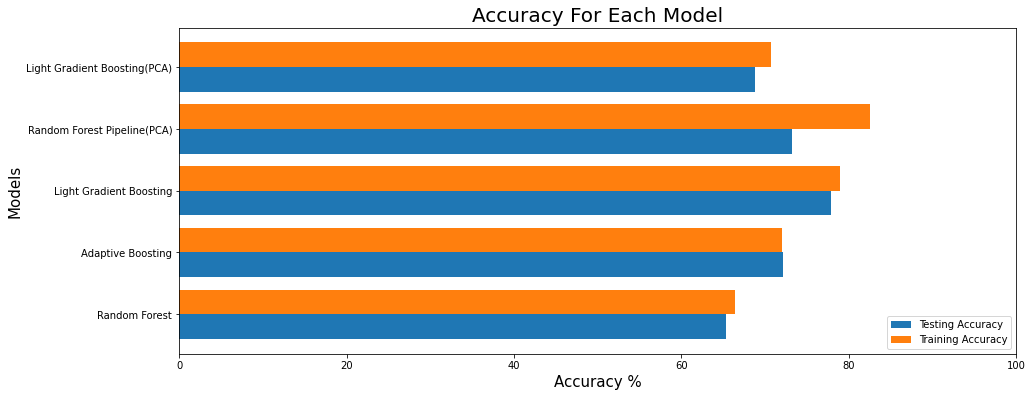

In [136]:
plt.figure(figsize=(15,6))
val_name = ['Random Forest','Adaptive Boosting','Light Gradient Boosting','Random Forest Pipeline(PCA)','Light Gradient Boosting(PCA)']
test_acc = [65.3,72.1,77.9,73.2,68.8]
train_acc = [66.4,72.0,78.9,82.5,70.7]

X_axis = np.arange(len(val_name))
  
plt.barh(X_axis - 0.2, test_acc, 0.4, label = 'Testing Accuracy')
plt.barh(X_axis + 0.2, train_acc, 0.4, label = 'Training Accuracy')

plt.yticks(X_axis, val_name)
plt.ylabel("Models", fontsize = 15)
plt.xlabel("Accuracy %",fontsize = 15)
plt.title("Accuracy For Each Model", fontsize = 20)
plt.legend(loc= ('lower right'));
plt.xlim(right=100);

## Evaluation For Each Model

**Dictionary**

Precision — What percent of your predictions were correct?

Recall — What percent of the positive cases did you catch?

F1 score — What percent of positive predictions were correct?

Support — What number of actual occurrences of the class in the specified dataset?

### Random Forest

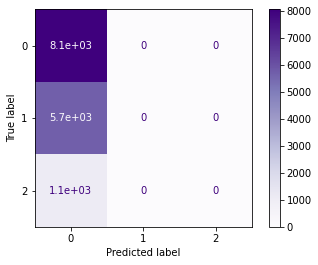

In [138]:
plot_confusion_matrix(rf, X_test, y_test, cmap = 'Purples');

In [126]:
cm_rf = metrics.confusion_matrix(y_test.values, rf.predict(X_test)).ravel()
cm_rf

array([8065,    0,    0, 5706,    0,    0, 1079,    0,    0])

In [127]:
rf_pred = rf.predict(X_test)
print('\nClassification Report\n')
print(classification_report(y_test, rf_pred, target_names=['Functional', 'Functional Needs Repair', 'Non Functional']));


Classification Report

                         precision    recall  f1-score   support

             Functional       0.54      1.00      0.70      8065
Functional Needs Repair       0.00      0.00      0.00      5706
         Non Functional       0.00      0.00      0.00      1079

               accuracy                           0.54     14850
              macro avg       0.18      0.33      0.23     14850
           weighted avg       0.29      0.54      0.38     14850



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This model only predicts for functional and neglect the other two pump conditions

### Adaptive Boosting

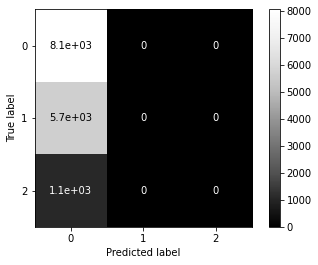

In [114]:
plot_confusion_matrix(aba, X_test, y_test, cmap = 'Greys_r');

In [128]:
cm_aba = metrics.confusion_matrix(y_test.values, aba.predict(X_test)).ravel()
cm_aba

array([8065,    0,    0, 5706,    0,    0, 1079,    0,    0])

In [129]:
aba_pred = aba.predict(X_test)
print('\nClassification Report\n')
print(classification_report(y_test, aba_pred, target_names=['Functional', 'Functional Needs Repair', 'Non Functional']));


Classification Report

                         precision    recall  f1-score   support

             Functional       0.54      1.00      0.70      8065
Functional Needs Repair       0.00      0.00      0.00      5706
         Non Functional       0.00      0.00      0.00      1079

               accuracy                           0.54     14850
              macro avg       0.18      0.33      0.23     14850
           weighted avg       0.29      0.54      0.38     14850



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This model only predicts for functional and neglect the other two pump conditions

### Light Gradient Boosting

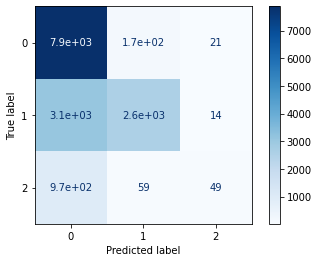

In [111]:
plot_confusion_matrix(lgbm, X_test, y_test, cmap = 'Blues');

In [130]:
cm_lgbm = metrics.confusion_matrix(y_test.values, lgbm.predict(X_test)).ravel()
cm_lgbm

array([7873,  171,   21, 3102, 2590,   14,  971,   59,   49])

In [131]:
lgbm_pred = lgbm.predict(X_test)
print('\nClassification Report\n')
print(classification_report(y_test, lgbm_pred, target_names=['Functional', 'Functional Needs Repair', 'Non Functional']));


Classification Report

                         precision    recall  f1-score   support

             Functional       0.66      0.98      0.79      8065
Functional Needs Repair       0.92      0.45      0.61      5706
         Non Functional       0.58      0.05      0.08      1079

               accuracy                           0.71     14850
              macro avg       0.72      0.49      0.49     14850
           weighted avg       0.75      0.71      0.67     14850



This model has decent results with above a 70% overall accuracy.

### Random Forest For 3 Components

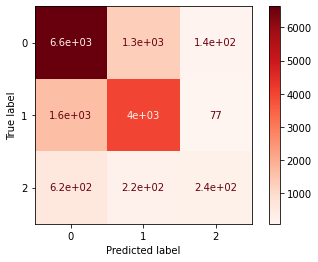

In [86]:
plot_confusion_matrix(rf_pipe, X_test, y_test, cmap = 'Reds');

In [132]:
cm_rf_pipe = metrics.confusion_matrix(y_test.values, rf_pipe.predict(X_test)).ravel()
cm_rf_pipe

array([6634, 1293,  138, 1632, 3997,   77,  616,  219,  244])

In [133]:
rf_pipe_pred = rf_pipe.predict(X_test)
print('\nClassification Report\n')
print(classification_report(y_test, rf_pipe_pred, target_names=['Functional', 'Functional Needs Repair', 'Non Functional']));


Classification Report

                         precision    recall  f1-score   support

             Functional       0.75      0.82      0.78      8065
Functional Needs Repair       0.73      0.70      0.71      5706
         Non Functional       0.53      0.23      0.32      1079

               accuracy                           0.73     14850
              macro avg       0.67      0.58      0.60     14850
           weighted avg       0.72      0.73      0.72     14850



This model has decent results with above a 70% overall accuracy.

### Light Gradient Boosting For 3 Components

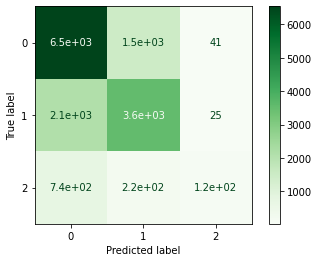

In [137]:
plot_confusion_matrix(lgbm_pipe, X_test, y_test, cmap = 'Greens');

In [134]:
cm_lgbm_pipe = metrics.confusion_matrix(y_test.values, lgbm_pipe.predict(X_test)).ravel()
cm_lgbm_pipe

array([6541, 1483,   41, 2121, 3560,   25,  737,  222,  120])

In [135]:
lgbm_pipe_pred = lgbm_pipe.predict(X_test)
print('\nClassification Report\n')
print(classification_report(y_test, lgbm_pipe_pred, target_names=['Functional', 'Functional Needs Repair', 'Non Functional']));


Classification Report

                         precision    recall  f1-score   support

             Functional       0.70      0.81      0.75      8065
Functional Needs Repair       0.68      0.62      0.65      5706
         Non Functional       0.65      0.11      0.19      1079

               accuracy                           0.69     14850
              macro avg       0.67      0.52      0.53     14850
           weighted avg       0.68      0.69      0.67     14850



This model is a little below average with a 69% overall accuracy.

## Final Results

Although Random Forest For 3 Components has the best accuracy with 73% the model looks a little overfit to me. This is why I will pick Light Gradient Boosting as my selected model because it does not overfit and have a 71% accuracy.